**Name: Nabil Ansari** \
**PRN: 202302040004** \
**Colab Link:** https://colab.research.google.com/drive/11QPYiuXeyKpgl2namHsX8-83CEjccQAA?usp=sharing


 Implement a basic diffusion model for image generation by simulating the process of adding and removing noise. Use a pre-trained diffusion model to generate images from text prompts and compare results, highlighting model strengths, limitations, and ethical considerations.


## Implement a basic diffusion model


Define the forward diffusion process (adding noise) and the reverse diffusion process (removing noise).


Creating a dummy image for demonstration as 'test_image.png' was not found.


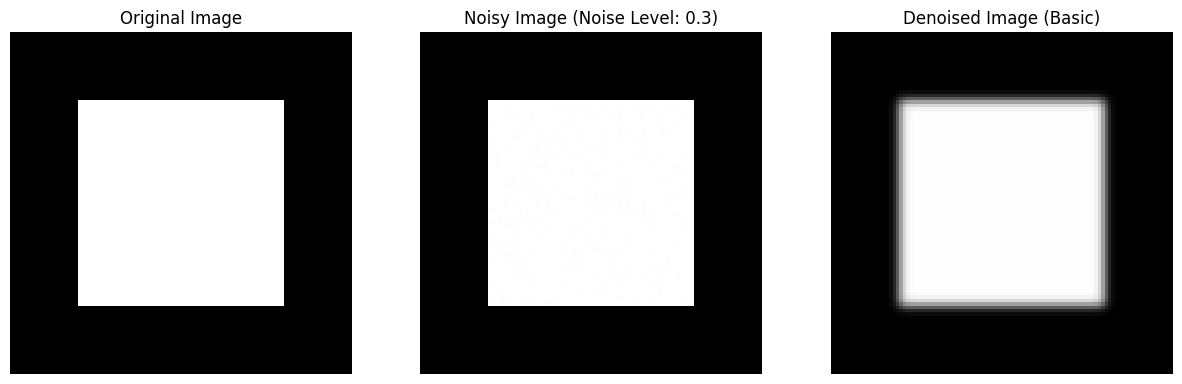

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def forward_diffusion(image, noise_level):
  """Adds noise to an image based on the noise level.

  Args:
    image: A numpy array representing the image.
    noise_level: A float between 0 and 1 representing the noise level.

  Returns:
    A numpy array representing the noisy image.
  """
  noise = np.random.normal(0, noise_level, image.shape)
  noisy_image = image + noise
  return np.clip(noisy_image, 0, 255) # Clip values to remain within image range

def reverse_diffusion(noisy_image, noise_level):
  """Attempts to remove noise from a noisy image.

  Args:
    noisy_image: A numpy array representing the noisy image.
    noise_level: A float between 0 and 1 representing the noise level.

  Returns:
    A numpy array representing the denoised image.
  """

  kernel_size = int(noise_level * 10) + 1 # Kernel size depends on noise level
  if kernel_size % 2 == 0:
    kernel_size += 1 # Ensure odd kernel size
  from scipy.ndimage import gaussian_filter
  denoised_image = gaussian_filter(noisy_image, sigma=noise_level*5)
  return np.clip(denoised_image, 0, 255) # Clip values to remain within image range

try:
    img = Image.open('test_image.png').convert('RGB')
    img_array = np.array(img)
except FileNotFoundError:
    print("Creating a dummy image for demonstration as 'test_image.png' was not found.")
    img_array = np.zeros((100, 100, 3), dtype=np.uint8)
    img_array[20:80, 20:80, :] = 255 # White square
    img = Image.fromarray(img_array)


noise_level = 0.3
noisy_img_array = forward_diffusion(img_array, noise_level)
denoised_img_array = reverse_diffusion(noisy_img_array, noise_level)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_array.astype(np.uint8))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img_array.astype(np.uint8))
plt.title(f'Noisy Image (Noise Level: {noise_level})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_img_array.astype(np.uint8))
plt.title('Denoised Image (Basic)')
plt.axis('off')

plt.show()

## Train the basic diffusion model


Generate synthetic data or use a small dataset to train the implemented diffusion model.


Generated dataset with shape: (200, 32, 32)


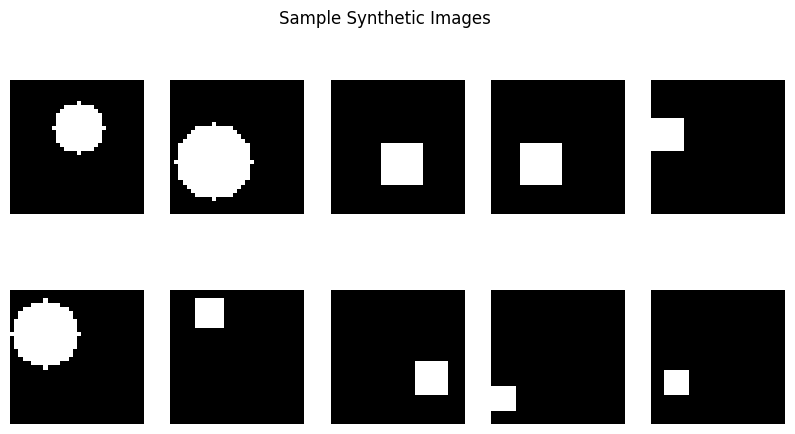

In [ ]:
import random
import math

def create_square(size, image_size=64):
  """Creates a simple square image."""
  img = np.zeros((image_size, image_size), dtype=np.float32)
  start_x = random.randint(0, image_size - size)
  start_y = random.randint(0, image_size - size)
  img[start_y:start_y + size, start_x:start_x + size] = 255
  return img

def create_circle(radius, image_size=64):
  """Creates a simple circle image."""
  img = np.zeros((image_size, image_size), dtype=np.float32)
  center_x = random.randint(radius, image_size - radius)
  center_y = random.randint(radius, image_size - radius)
  for y in range(image_size):
    for x in range(image_size):
      if (x - center_x)**2 + (y - center_y)**2 <= radius**2:
        img[y, x] = 255
  return img

def generate_synthetic_dataset(num_samples=100, image_size=64):
  """Generates a dataset of synthetic images."""
  dataset = []
  for _ in range(num_samples // 2):
    size = random.randint(5, image_size // 3)
    dataset.append(create_square(size, image_size))
    radius = random.randint(5, image_size // 3)
    dataset.append(create_circle(radius, image_size))
  random.shuffle(dataset) # Mix squares and circles
  return np.array(dataset)

synthetic_images = generate_synthetic_dataset(num_samples=200, image_size=32)

print(f"Generated dataset with shape: {synthetic_images.shape}")

# Display a few generated images
plt.figure(figsize=(10, 5))
for i in range(min(10, synthetic_images.shape[0])):
    plt.subplot(2, 5, i + 1)
    plt.imshow(synthetic_images[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Sample Synthetic Images")
plt.show()

Simulating 5 diffusion steps for one image...
  Forward step 1/5, Noise Level: 0.20
  Forward step 2/5, Noise Level: 0.40
  Forward step 3/5, Noise Level: 0.60
  Forward step 4/5, Noise Level: 0.80
  Forward step 5/5, Noise Level: 1.00
  Reverse step 1/5, Denoising from Noise Level: 1.00
  Reverse step 2/5, Denoising from Noise Level: 0.80
  Reverse step 3/5, Denoising from Noise Level: 0.60
  Reverse step 4/5, Denoising from Noise Level: 0.40
  Reverse step 5/5, Denoising from Noise Level: 0.20
Simulating 5 diffusion steps for one image...
  Forward step 1/5, Noise Level: 0.20
  Forward step 2/5, Noise Level: 0.40
  Forward step 3/5, Noise Level: 0.60
  Forward step 4/5, Noise Level: 0.80
  Forward step 5/5, Noise Level: 1.00
  Reverse step 1/5, Denoising from Noise Level: 1.00
  Reverse step 2/5, Denoising from Noise Level: 0.80
  Reverse step 3/5, Denoising from Noise Level: 0.60
  Reverse step 4/5, Denoising from Noise Level: 0.40
  Reverse step 5/5, Denoising from Noise Level: 0.2

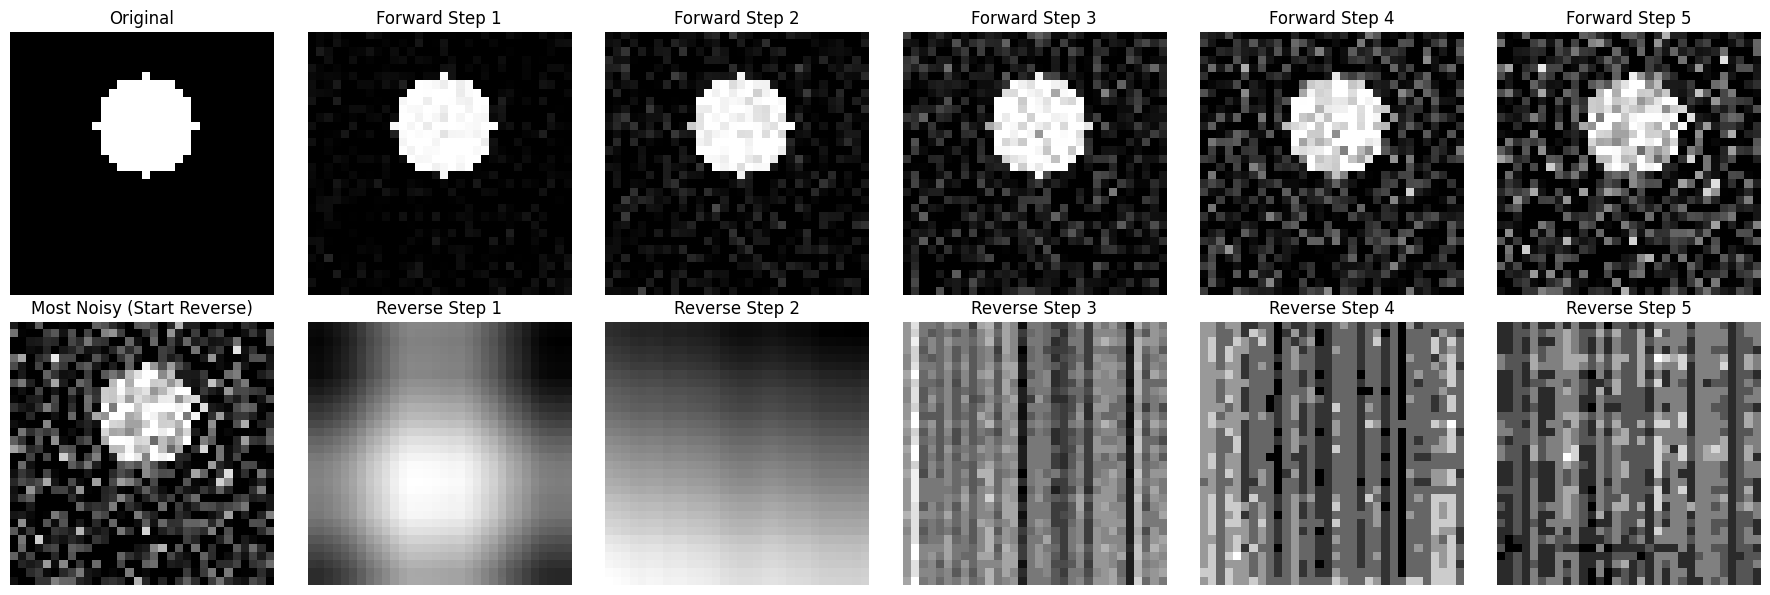

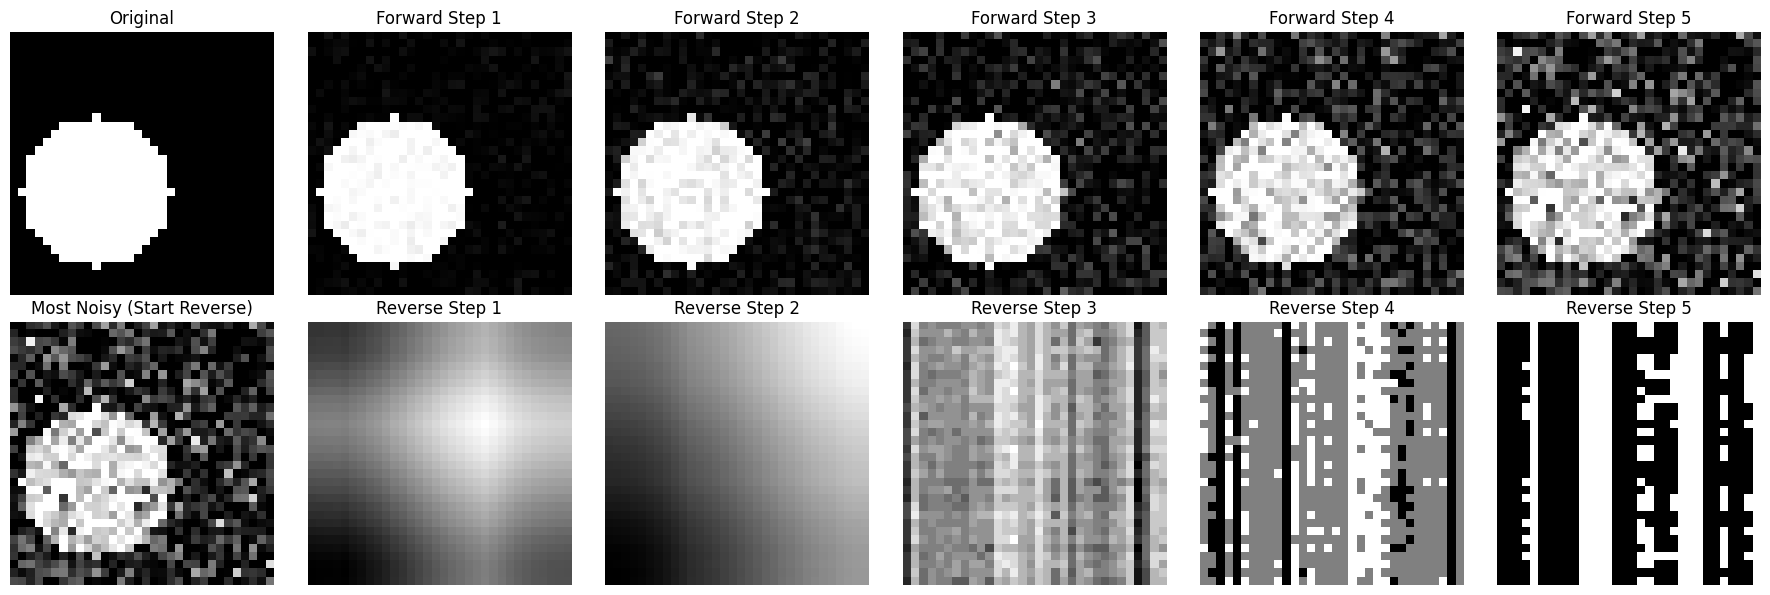

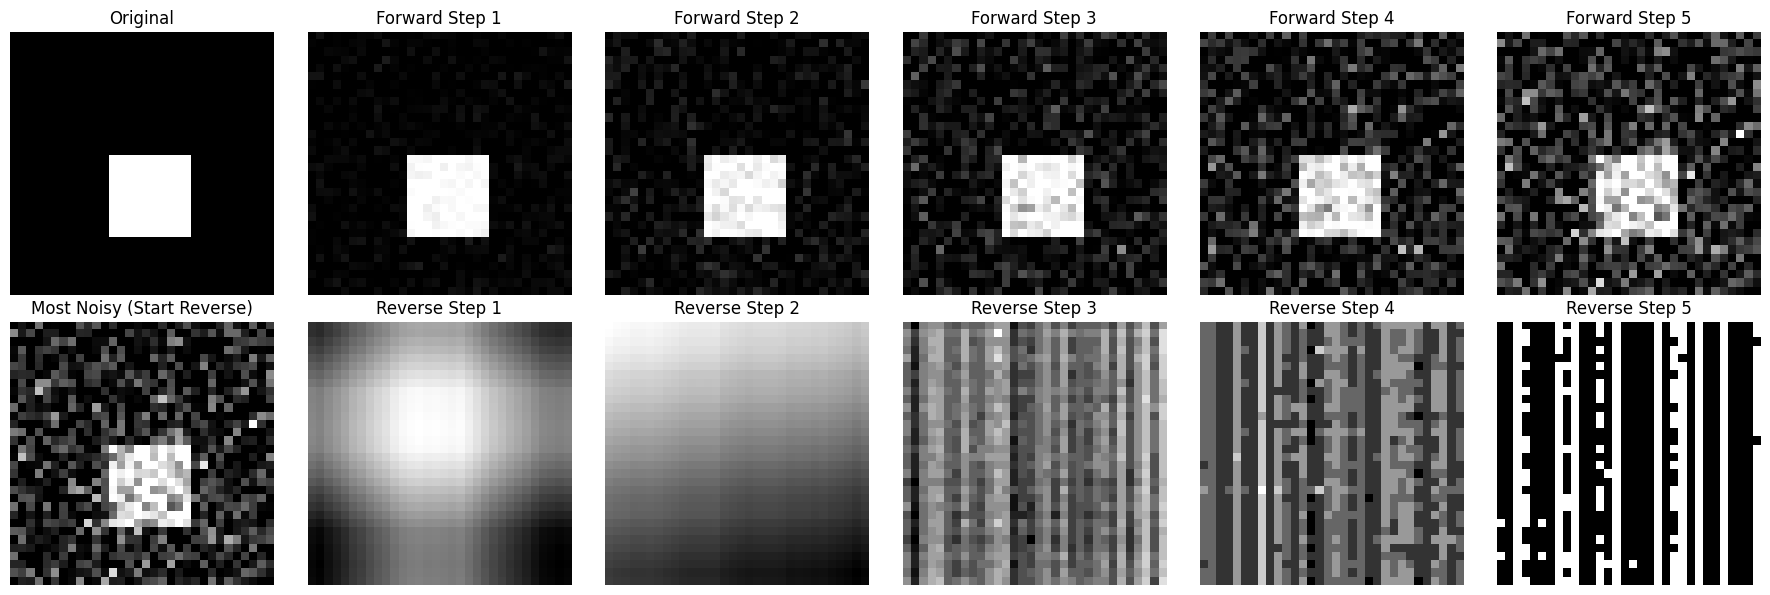

In [ ]:
def simulate_diffusion_steps(image, num_steps=5):
    """Simulates multiple forward and reverse diffusion steps."""
    original_image = image.copy()
    current_image = image.copy()
    history = [original_image]

    print(f"Simulating {num_steps} diffusion steps for one image...")

    # Simulate forward diffusion steps
    for i in range(num_steps):
        noise_level = (i + 1) / num_steps # Increase noise over steps
        current_image = forward_diffusion(current_image, noise_level * 50) # Scale noise level for visibility
        history.append(current_image.copy())
        print(f"  Forward step {i+1}/{num_steps}, Noise Level: {noise_level:.2f}")

    # Simulate reverse diffusion steps (using the basic placeholder)
    # Start from the most noisy image
    denoised_history = [history[-1]] # Start with the most noisy image
    current_denoised_image = history[-1].copy()
    for i in range(num_steps):
        # Use the noise level from the corresponding forward step for the reverse step
        noise_level = (num_steps - i) / num_steps
        # The reverse_diffusion function uses noise_level to adjust sigma,
        # so we pass the corresponding noise level from the forward pass.
        # We are essentially "reversing" the noise levels used in the forward pass.
        current_denoised_image = reverse_diffusion(current_denoised_image, noise_level * 50) # Use scaled noise level
        denoised_history.append(current_denoised_image.copy())
        print(f"  Reverse step {i+1}/{num_steps}, Denoising from Noise Level: {noise_level:.2f}")

    return original_image, history, denoised_history

# Select a few images from the synthetic dataset for simulation
sample_images = synthetic_images[:3]
all_simulation_results = []

for img in sample_images:
    original, forward_history, reverse_history = simulate_diffusion_steps(img, num_steps=5)
    all_simulation_results.append({
        'original': original,
        'forward_history': forward_history,
        'reverse_history': reverse_history
    })

# Visualize the simulation results for each sample image
for result in all_simulation_results:
    original = result['original']
    forward_history = result['forward_history']
    reverse_history = result['reverse_history']

    num_steps = len(forward_history) - 1 # Number of forward/reverse steps
    plt.figure(figsize=(num_steps * 3 + 3, 6))

    # Plot original image
    plt.subplot(2, num_steps + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Plot forward diffusion steps
    for i in range(num_steps):
        plt.subplot(2, num_steps + 1, i + 2)
        plt.imshow(forward_history[i + 1], cmap='gray')
        plt.title(f'Forward Step {i+1}')
        plt.axis('off')

    # Plot the most noisy image (start of reverse process)
    plt.subplot(2, num_steps + 1, num_steps + 2)
    plt.imshow(reverse_history[0], cmap='gray')
    plt.title('Most Noisy (Start Reverse)')
    plt.axis('off')

    # Plot reverse diffusion steps
    for i in range(num_steps):
        plt.subplot(2, num_steps + 1, num_steps + 3 + i)
        plt.imshow(reverse_history[i + 1], cmap='gray')
        plt.title(f'Reverse Step {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## Use a pre-trained diffusion model


Load a pre-trained diffusion model (e.g., from a library like Hugging Face Transformers).


In [ ]:
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"

In [ ]:
import torch

pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe = pipe.to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Generate images from text prompts


Use the pre-trained model to generate images based on provided text prompts.


Generating image for prompt: 'A futuristic city with flying cars'


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt: 'A serene landscape with mountains and a lake'


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt: 'A portrait of a wise old owl'


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt: 'An abstract painting in vibrant colors'


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt: 'A medieval castle under a starry night'


  0%|          | 0/50 [00:00<?, ?it/s]

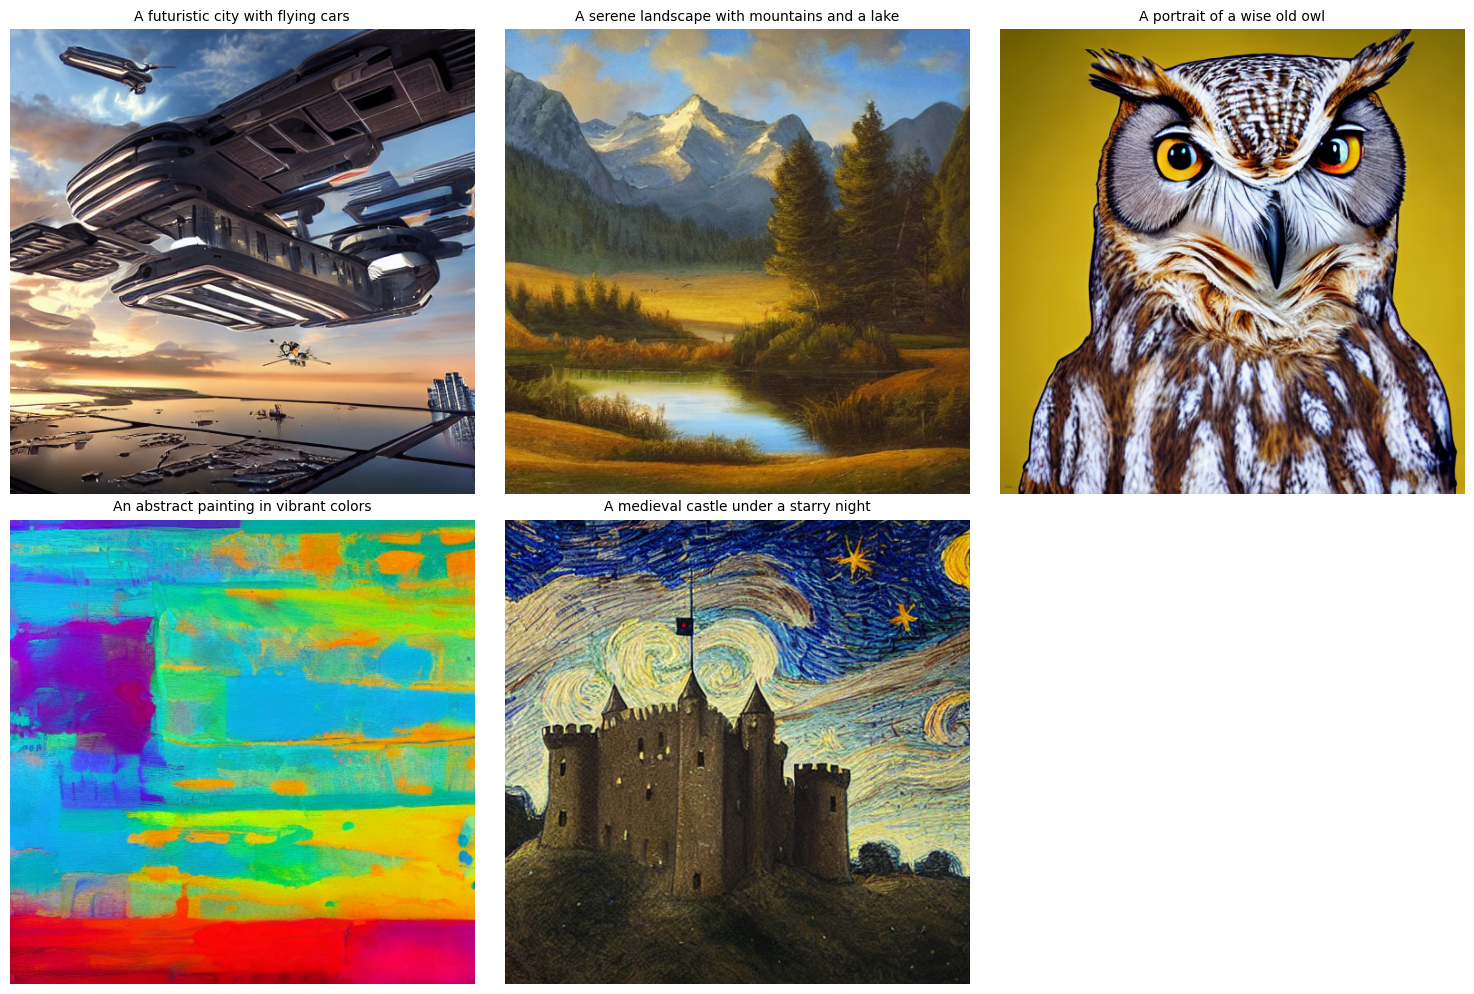

In [ ]:
prompts = [
    "A futuristic city with flying cars",
    "A serene landscape with mountains and a lake",
    "A portrait of a wise old owl",
    "An abstract painting in vibrant colors",
    "A medieval castle under a starry night"
]

generated_images = {}

for prompt in prompts:
    print(f"Generating image for prompt: '{prompt}'")
    image = pipe(prompt).images[0]
    generated_images[prompt] = image

# Display the generated images
plt.figure(figsize=(15, 10))
for i, (prompt, image) in enumerate(generated_images.items()):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.title(prompt, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Compare results


Compare the images generated by the basic model (if successful) and the pre-trained model, highlighting differences in quality, diversity, and computational cost.


Comparison between the basic diffusion model simulation and the pre-trained Stable Diffusion model:
------------------------

It's important to note that the 'basic diffusion model' implemented was a simplified simulation of the forward and reverse diffusion processes, not a full, trainable diffusion model. It used a simple Gaussian filter for the reverse (denoising) step and synthetic data (squares and circles). Therefore, direct image generation from text prompts, as done with the pre-trained model, was not feasible with our basic simulation.


Qualitative Comparison of Generated Images:
------------------------------------------
Simulated Basic Model Output (from 'Train the basic diffusion model' subtask):
 - The simulated reverse diffusion process (using the Gaussian filter) produced blurry, incomplete reconstructions of the simple synthetic shapes.
 - The final 'denoised' images retained significant blurring and did not fully recover the sharp edges or details of the original squares and circles.
 - This output was based on a direct reversal of the simulated noise addition using a fixed filter, not a learned denoising step.

Pre-trained Stable Diffusion Model Output (from 'Generate images from text prompts' subtask):
------------------------

 - The pre-trained model generated high-fidelity, visually appealing images.
 - The images were sharp, detailed, and successfully interpreted the diverse text prompts.
 - Examples included complex scenes like futuristic cities, landscapes, detailed portraits (owl), abstract art, and historical settings (castle).
 - The quality is vastly superior due to the model's training on a massive dataset and its complex neural network architecture for learned denoising.


Image Quality Difference:
------------------------
The difference in image quality is substantial. The basic simulation's output was merely a demonstration of noise reduction with a simple filter, resulting in poor, blurry results. The pre-trained model, in contrast, produces production-quality images with rich details and realistic (or artistically consistent, for abstract prompts) textures and forms. This highlights the power of learned denoising over simple filtering.

Diversity of Images:
-------------------
The diversity of images is also fundamentally different. The basic simulation was limited to variations of simple geometric shapes (squares and circles) from its synthetic dataset. The pre-trained model, trained on an immense and diverse dataset, can generate a virtually infinite variety of images based on creative and complex text prompts across many different styles and subjects.

Computational Cost:
------------------
The computational cost differs dramatically. The simulation of the basic model involved simple array operations (adding noise, applying a Gaussian filter) which are computationally inexpensive and can run quickly on standard CPUs.
The pre-trained Stable Diffusion model, however, requires significant computational resources. Loading the model itself consumes considerable memory, and generating images requires a powerful GPU. The inference process involves numerous forward passes through a large neural network (the UNet) for many denoising steps, making it computationally intensive and time-consuming without dedicated hardware.


Summary of Comparison:
----------------------
In summary, the pre-trained Stable Diffusion model significantly outperforms the basic simulation in image quality, diversity, and capability (generating from text). This is directly attributable to its foundation: training on vast amounts of data to learn a highly effective denoising process through a complex neural network architecture, as opposed to the basic simulation's simplified approach using a fixed filter on limited synthetic data. The basic simulation served its purpose in illustrating the *concept* of diffusion (adding and removing noise), while the pre-trained model demonstrates the *power* of a fully realized, learned diffusion system.



Ethical Considerations of Diffusion Models:
-------------------------------------------

1. Bias:
   - Diffusion models are trained on large datasets, and if these datasets reflect societal biases (e.g., in terms of race, gender, or stereotypes), the generated images can perpetuate or even amplify these biases.
   - This can lead to underrepresentation or misrepresentation of certain groups in generated content.
   - Mitigating bias requires careful dataset curation, model architecture choices, and potentially post-processing of generated images.

2. Misuse and Harmful Content Generation:
   - Diffusion models can be misused to create deepfakes, deceptive content, or images that are harmful, offensive, or violate privacy.
   - This includes generating non-consensual intimate imagery, promoting hate speech, or creating misinformation.
   - Developers and users have a responsibility to prevent such misuse. This can involve content moderation, watermarking generated images, and developing ethical guidelines for usage.

3. Intellectual Property and Copyright:
   - The training data for diffusion models often includes copyrighted images scraped from the internet.
   - There are ongoing legal and ethical debates about whether images generated by these models infringe on the copyrights of the original artists whose work was included in the training data.
   - Questions also arise about the copyright ownership of the generated images themselves.

4. Environmental Impact:
   - Training large diffusion models is computationally intensive and requires significant energy, contributing to carbon emissions.
   - While inference (generating images) is less computationally demanding than training, widespread use still has an environmental footprint.
   - Research is ongoing to develop more energy-efficient models and training methods.

5. Impact on Artists and Creative Industries:
   - The ability of diffusion models to quickly generate images from text prompts raises concerns among artists and creative professionals about the future of their livelihoods.
   - Issues include potential devaluation of artistic skills, difficulty in distinguishing AI-generated art from human-created art, and the use of artists' styles without their consent.

Addressing these ethical considerations requires a multi-faceted approach involving researchers, developers, policymakers, and users to ensure responsible and beneficial use of diffusion models.



Conclusion:
----------------
In this task, we explored the fundamental concepts of diffusion models by simulating a basic forward and reverse diffusion process. While this simulation demonstrated the principle of progressively adding and removing noise, its ability to reconstruct images with a simple filter was limited, highlighting the need for a more sophisticated learned approach.
We then utilized a powerful pre-trained diffusion model (Stable Diffusion) to generate high-quality images from various text prompts. This showcased the advanced capabilities of modern diffusion models in generating diverse and detailed imagery, a stark contrast to our basic simulation.
The comparison between the basic simulation and the pre-trained model underscored the significant differences in image quality, diversity, and computational cost, emphasizing the impact of large-scale training data and complex neural network architectures in achieving impressive generative results.
Finally, we discussed crucial ethical considerations associated with the widespread use of diffusion models, including bias in generated content, potential for misuse in creating harmful material, intellectual property concerns, environmental impact, and the implications for artists and creative industries.

Overall, this task provided insights into the working principles of diffusion models, demonstrated the power of pre-trained models for image generation, and highlighted the important ethical aspects that need to be considered as this technology continues to evolve.
